### 데이터 분석
1.  데이터 수집: 
 * 기간을 두고 업체/개인 직접 수집, 
 * 데이터를 제공하는 기관으로 부터 받아오기(통계청/공공데이터/기업 open 데이터 등)
 * Open API / 크롤링
 * 파일로 저장/데이터베이스 서버구축 후 저장(오라클DB, MSSQL, MySQL, MariaDB, MongoDB)
2. 저장
 * 저장소에 저장 방법/실시간/시간, 분단위 저장 방법
3. 전처리
 * 분석에 적합한 데이터 구성으로 만듬
4. 분석
 * 다양한 분석 방법을 통해 분석

## 네이버 지식인 검색결과 분석(제주도)

In [1]:
# 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 완료후 반드시 런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


1. 데이터 파일 업로드
- 코랩의 가상 디스크에 파일 업로드

In [ ]:
from google.colab import files
myfile = files.upload()

Saving 제주도_지식인.csv to 제주도_지식인.csv


- 구글 드라이브 연결

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# 작업 폴더로 이동
%cd /content/drive/MyDrive/multi

/content/drive/MyDrive/multi


In [9]:
# 현재 작업중인 폴더 위치 출력
!pwd

/content/drive/MyDrive/multi


In [10]:
# 하위 폴더 및 현재 폴더에 있는 파일 확인
!ls

0307  0308  0310  0311	0314  0315  0316  0330	0331  pic1_200.jpg


In [11]:
filename = './0331/data/제주도_지식인.csv'   # 상대주소
# filename = '/content/drive/MyDrive/data/제주도_지식인.csv' # 절대주소

2. pandas 모듈을 이용해 **데이터** 읽어오기

In [12]:
import pandas as pd

In [34]:
# files 모듈로 업로드한 데이터 가져오기
df = pd.read_csv('/content/제주도_지식인.csv')
df.head(1)

,title,link,description,질문,답변
0,<b>제주도</b> 신혼여행 질문입니다.,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 신혼여행을 5월1일날 <b>제주도</b>로 가게되었는데 그때의 <b>제주도<...,4월에 결혼식을 앞둔 예비신랑입니다. 신혼여행을 5월1일날 제주도로 가게되었는데그때...,건강한 사람이라면 반팔에 바람막이 얇은 옷 하나 들고 가세요접으면 주먹만한 ...


In [35]:
# 구글 드라이브에 있는 데이터 가져오기
df = pd.read_csv(filename)
df.head(1)

,title,link,description,질문,답변
0,<b>제주도</b> 신혼여행 질문입니다.,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 신혼여행을 5월1일날 <b>제주도</b>로 가게되었는데 그때의 <b>제주도<...,4월에 결혼식을 앞둔 예비신랑입니다. 신혼여행을 5월1일날 제주도로 가게되었는데그때...,건강한 사람이라면 반팔에 바람막이 얇은 옷 하나 들고 가세요접으면 주먹만한 ...


3. 데이터 전처리

In [36]:
# 데이터 구성 요소 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        1000 non-null   object
 1   link         1000 non-null   object
 2   description  1000 non-null   object
 3   질문           1000 non-null   object
 4   답변           975 non-null    object
dtypes: object(5)
memory usage: 39.2+ KB


In [37]:
# 불필요한 열 삭제("description")

# 삭제열이 1개일 경우
del df['description']   # 실행 즉시 삭제

# 데이터가 많은 경우(loc[], iloc[] 사용)
#df.loc[:, ['title', 'link', '질문', '답변']]
#df.iloc[:, [0, 1, 3, 4]]

In [38]:
# 열 이름 확인
df.columns

Index(['title', 'link', '질문', '답변'], dtype='object')

In [39]:
# 열 이름 변경
df.columns = ['title', 'link', 'question', 'answer']
df.columns

Index(['title', 'link', 'question', 'answer'], dtype='object')

In [40]:
# df
df[df['answer'] == ""]

,title,link,question,answer


### NaN 값 삭제
- DataFrame.dropna( axis=0, how='any', thresh=None, subset=None, inplace=False )
- axis = 0 (row) 혹은 1 (column)
- how = 'any' 일 경우, label 중 하나만 NaN이어도 해당 label을 삭제함.
- how = 'all' 일 경우, label 의 모든 데이터가 NaN이어야 해당 label을 삭제함.
- subset 다른 축(axis)의 어떤 label를 고려해야 하는지 list형태로 지정

In [41]:
# 데이터의 NaN 값 건수 확인
df.isna().sum()

title        0
link         0
question     0
answer      25
dtype: int64

In [ ]:
# nan 데이터가 포함되어 있는 행 전체 삭제(df에 적용: df=drop() / df.drop(inplace=True))
df.dropna()        # nan이 1개라도 포함되어 있으면 해당 행 삭제
df.dropna(subset=["answer"])    # answer에 nan이 있으면 행 전체 삭제
df.dropna(axis=1)   # nan이 포함된 열 전체를 삭제

### NaN을 다른 데이터로 대체하기
- DataFrame.fillna( value=None, method=None, axis=None, inplace=False, limit=None, downcast=None )
- value = 스칼라, dict, Series, DataFrame 만 넣을 수 있다.

In [ ]:
# 특정 필드에 조건을 주어 nan 값 변경(예: 남자(1) / 여자(2)에 따라 평균 나이 입력)

# ex) df[df['성별']==1]["나이"].fillna(df[df['성별']==1]["나이"].mean())

In [42]:
df['answer'].fillna("내용없음", inplace=True)    # 입력 특정 값으로 nan 값 대체
df['answer'] = df['answer'].fillna("내용없음")

In [43]:
df.isna().sum()

title       0
link        0
question    0
answer      0
dtype: int64

title 열의 값을 가져와 형태소 분석 진행

In [51]:
# df['title'] 데이터를 하나의 데이터(text)로 만들기
title_txt = ""

for txt in df['title']:
  #print(txt)
  title_txt += txt + "\n"

print(title_txt)

<b>제주도</b> 신혼여행 질문입니다. <b>제주도</b> 3박4일 여행코스 <b>제주도</b> 호텔 숙박 <b>제주도</b> 숙소,맛집 추천 <b>제주도</b> 렌트카 청주-&gt; <b>제주도</b> 우편 보내기 Cu 택배 <b>제주도</b> <b>제주도</b> 음악과 고등학교 구해줘 <b>제주도</b> 가족숙소 대전 <b>제주도</b> 탁송 가격 문의 이번주 <b>제주도</b>옷차림? <b>제주도</b> 여행 남자 <b>제주도</b>렌트카 차량별 실시간 <b>제주도</b> 날씨질문 ㅜ <b>제주도</b> 여행 <b>제주도</b> 여행 시 코로나 검사 해외입국 <b>제주도</b>까지 <b>제주도</b> 중국인 관광 <b>제주도</b>와 프랑스의 차이 <b>제주도</b> 지진 <b>제주도</b> 관광 장소 찾아요!!! 1월 <b>제주도</b> 2밥3일 여행 <b>제주도</b>숙박 싼곳 없을까요? 커플 2박 3일 <b>제주도</b> 여행 <b>제주도</b> 벚꽃 개화시기 <b>제주도</b> 여행 관련 질문!(2인기준) <b>제주도</b> 관련 질문 입니당 <b>제주도</b> 가족여행 3박4일? 4박5일? <b>제주도</b> 숙소 미성년자 <b>제주도</b> 전연령 렌트카 <b>제주도</b> 여행시 음성확인서 군인 <b>제주도</b> 여행 혜택 <b>제주도</b> 갈치조림 맛집 진짜로! <b>제주도</b> 흑돼지 기대중입니다 <b>제주도</b> 청소년 백신패스 <b>제주도</b> 여행 코스 <b>제주도</b> 안 가면 후회되는 곳 <b>제주도</b> 보름살기 숙소 추천!! <b>제주도</b> 가볼만한곳 좀 알려주세요! <b>제주도</b>갈치 찾아야겠어요 <b>제주도</b>갈치조림 확실하게 <b>제주도</b> 지진 5.3 피해 규모 후기 좋은 <b>제주도</b>렌트카 어디?! <b>제주도</b>숙박 저렴하게 이용하기 <b>제주도</b> 여행 렌트 백신 미접종 <b>제주도</b> 여행 <b>제주도</b> 맛집 <b>제주도</b>지도 좀 알려주세요~ <b>제주도</

In [53]:
# re 모듈과 정규화 표현법을 이용해 필요한 문자만 남기기
import re

title_txt = re.sub('[^0-9ㄱ-ㅣ가-힣 ]', ' ', title_txt)
title_txt

'제주도 신혼여행 질문입니다 제주도 3박4일 여행코스 제주도 호텔 숙박 제주도 숙소맛집 추천 제주도 렌트카 청주 제주도 우편 보내기  택배 제주도 제주도 음악과 고등학교 구해줘 제주도 가족숙소 대전 제주도 탁송 가격 문의 이번주 제주도옷차림 제주도 여행 남자 제주도렌트카 차량별 실시간 제주도 날씨질문 ㅜ 제주도 여행 제주도 여행 시 코로나 검사 해외입국 제주도까지 제주도 중국인 관광 제주도와 프랑스의 차이 제주도 지진 제주도 관광 장소 찾아요 1월 제주도 2밥3일 여행 제주도숙박 싼곳 없을까요 커플 2박 3일 제주도 여행 제주도 벚꽃 개화시기 제주도 여행 관련 질문2인기준 제주도 관련 질문 입니당 제주도 가족여행 3박4일 4박5일 제주도 숙소 미성년자 제주도 전연령 렌트카 제주도 여행시 음성확인서 군인 제주도 여행 혜택 제주도 갈치조림 맛집 진짜로 제주도 흑돼지 기대중입니다 제주도 청소년 백신패스 제주도 여행 코스 제주도 안 가면 후회되는 곳 제주도 보름살기 숙소 추천 제주도 가볼만한곳 좀 알려주세요 제주도갈치 찾아야겠어요 제주도갈치조림 확실하게 제주도 지진 53 피해 규모 후기 좋은 제주도렌트카 어디 제주도숙박 저렴하게 이용하기 제주도 여행 렌트 백신 미접종 제주도 여행 제주도 맛집 제주도지도 좀 알려주세요 제주도 호텔취업 질문 제주도 배달 제주도2박3일여행코스추천 제주도 관광지 추천해주세요 제주도한달살이 궁금한 것들 제주도 영어학원 제주도렌트카 궁금합니다 제주도 항공권 예약 할려고 해여 제주도일정 제주도 도민이 소개하는 맛집 초보운전인데 제주도 제주도로 이사가는데 제주도 갈만한곳 맛집 제주도렌트카 차량별 할인 강아지 제주도 제주도 여행 질문이요 제주도 호텔 추천받고싶어요 제주도렌트카 고등학생 제주도 제주도 여행지 여자 혼자 제주도 2주 여행하기 제주도 신혼여행 호텔 어떻게할까요 제주도 영어회화 학원 추천 제주도 여행경비 질문 크리스마스 제주도 제주도 3박4일 여행 제주도 숙소 추천 제주도 첫 여행 제주도 2박3일 여름휴가8202 제주도 여행 제주도 여자랑 

형태소 분석

In [ ]:
# konlpy 설치
!pip install konlpy

In [55]:
from konlpy.tag import Okt
import nltk
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = "NanumGothic")

In [58]:
okt = Okt()
title_nouns = okt.nouns(title_txt)
len(title_nouns)

3081

In [59]:
# 고유단어 확인
len(set(title_nouns))

491

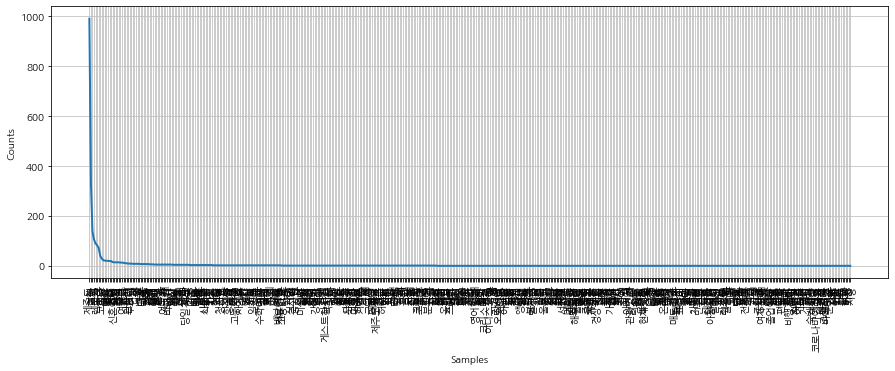

In [61]:
# 텍스트에 대한 시각화
title_plot = nltk.Text(title_nouns)
plt.figure(figsize=(15, 5))
title_plot.plot()
plt.show()

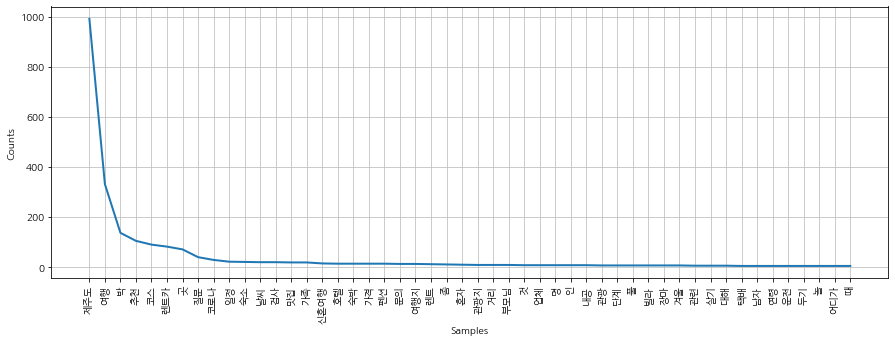

In [71]:
# 텍스트에 대한 시각화(상위 50개만 출력)
title_plot = nltk.Text(title_nouns)
plt.figure(figsize=(15, 5))
title_plot.plot(50)
plt.show()

In [ ]:
from collections import Counter   # jdk에서 제공해주는 라이브러리

title_cnt = Counter(title_nouns)   # 데이터의 원소 단위로 빈도수 계산, 딕셔너리 형식으로 제공
title_cnt

단어 빈도수가 10건 이하인 데이터 제거

In [66]:
# 딕셔너리 구조를 튜플 구조로 변경(예: (key, value))
title_tu =  title_cnt.most_common()
title_tu[:5]

[('제주도', 991), ('여행', 332), ('박', 138), ('추천', 106), ('코스', 91)]

In [73]:
#title_rev = []
#for (key, num) in title_tu:
#    if num >= 10:
#        title_rev.append((key, num))

title_rev = [ (key, num) for (key, num) in title_tu if num >= 5 and key != "제주도"]
title_rev[:10]

[('여행', 332),
 ('박', 138),
 ('추천', 106),
 ('코스', 91),
 ('렌트카', 83),
 ('곳', 72),
 ('질문', 41),
 ('코로나', 30),
 ('일정', 23),
 ('숙소', 22)]

워드클라우드를 통해 시각화

In [68]:
!pip install WordCloud

In [69]:
from wordcloud import WordCloud as WC
import matplotlib.pyplot as plt

# 글골 패치 설정
path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

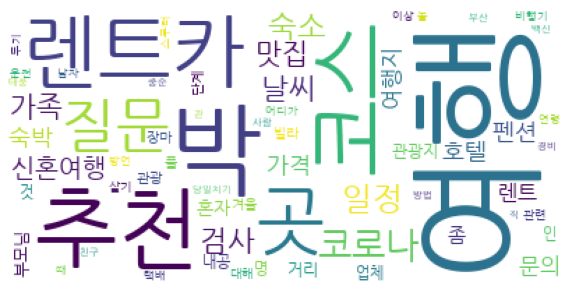

In [74]:
## title을 이용해 워드클라우드 생성
## 워드클라우드의 데이터는 딕셔너리 구조의 데이터야 함({"단어":빈도수})

wc_data=dict(title_rev)
wc1 = WC(font_path=path, background_color='white')
wc2 = wc1.generate_from_frequencies(wc_data)

plt.figure(figsize=(10, 10))
plt.imshow(wc2)    # 워드클라우드 이미지 생성
plt.axis('Off')    # 눈금선 제거
plt.show()

### [미션] 제주도 지식인 검색 데이터를 이용한 형태소 분석
- 데이터: 제주도 지식인 검색 결과
- question와 answer 열에서 각각 데이터 빈도수와 워드클라우드 작성


In [ ]:
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import rc
import nltk
import re
rc('font', family = "NanumGothic")

위 미션을 완성하시면 형용사/명사/부사를 이용해서도 작성해 보세요